# Análisis de datos archivo comercios Haulmer 

Por : Christian Vergara Retamal - Benjamín Sánchez Aliste
      

Los datos dispuestos se obtienen desde plataforma swipe, la cual contiene bbdd de interés de Haulmer. En el archivo se detallan las siguientes variables : 






---

## Aspectos Computacionales

**Librerías utilizadas para el funcionamiento del notebook**

* numpy  versión 1.21.6 : Álgebra lineal y matemáticas
* pandas versión 1.3.5 : Manejo y análisis de estructuras de datos
* seaborn versión 0.11.2 : Visualización de gráficos
* matplotlib 3.2.2 : Gráficos
* Scikit-learn 1.0.2 : Machine Learning

---

## Preparación Ambiente de Trabajo

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

### Importación y observación del set de datos

In [2]:
# Datos de ConversionLeads Haulmer
data = pd.read_csv("/content/drive/MyDrive/Datos/Christian/Datos Haulmer/comercios.csv", delimiter = ",")

In [3]:
# Las columnas del set de datos
data.columns

Index(['Rut', 'Razón Social', 'Nombre de Fantasia', 'Tipo de Comercio',
       'Estado', 'Cuenta de Pago', 'Fecha de creación',
       'Actividad de Comercio', 'Perfil de Riesgo', 'Origen de Verificación',
       'Vendedor'],
      dtype='object')

In [4]:
# Muestra del conjunto de datos
data.sample(5)

,Rut,Razón Social,Nombre de Fantasia,Tipo de Comercio,Estado,Cuenta de Pago,Fecha de creación,Actividad de Comercio,Perfil de Riesgo,Origen de Verificación,Vendedor
449,18.021.762-2,MARIA IGNACIA ALVAREZ ARGALUZA,Human Integration Administrator,Empresa Jurídica (1ra Cat),Esperando verificación,testqa DB,16 feb. 2022,Servicios de médicos prestados de[...],-,Venta Online,NaN
1405,10.525.193-9,MARLENE ADELINA MENESES ORELLANA,San Ignacio,Empresa Natural (1ra Cat),Activo,Banco Estado Cuenta Corriente,6 dic. 2021,Venta al por menor en comercios de[...],Perfil de riesgo Predefinido,Venta Online,NaN
262,9.272.415-8,SANDRA DEL CARMEN GALLARDO ESPARZA,ESTILO,Empresa Natural (1ra Cat),Activo,Cuenta Banco Chile,2 mar. 2022,Peluquería y otros tratamientos de[...],Perfil de riesgo Predefinido,Venta Online,NaN
753,15.907.776-4,PATRICIO ANTONIO ABARZA BRAVO,Patricio,Empresa Natural (1ra Cat),Activo,Cuenta de pago por defecto,25 ene. 2022,Venta al por menor de alimentos en[...],Perfil de riesgo Predefinido,Venta Online,NaN
1001,9.477.575-2,ANA MARIA CABRERA VERDEJO,MADAPAGU,Empresa Natural (1ra Cat),Activo,ANITA CABRERA,7 ene. 2022,Venta al por menor de alimentos en[...],Perfil de riesgo Predefinido,Venta Online,NaN


In [5]:
# Cantidad de filas y columnas
print("El dataframe anime consta de {} atributos (columnas) y {} registros (filas)".format(data.shape[1], data.shape[0]))

El dataframe anime consta de 11 atributos (columnas) y 2312 registros (filas)


## Análisis descriptivo

In [6]:
# Cantidad de registros por columna y tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312 entries, 0 to 2311
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rut                     2312 non-null   object
 1   Razón Social            2312 non-null   object
 2   Nombre de Fantasia      2312 non-null   object
 3   Tipo de Comercio        2312 non-null   object
 4   Estado                  2312 non-null   object
 5   Cuenta de Pago          2312 non-null   object
 6   Fecha de creación       2312 non-null   object
 7   Actividad de Comercio   2312 non-null   object
 8   Perfil de Riesgo        2312 non-null   object
 9   Origen de Verificación  2312 non-null   object
 10  Vendedor                3 non-null      object
dtypes: object(11)
memory usage: 198.8+ KB


In [7]:
# Descripción de los datos numéricos
data.describe()

,Rut,Razón Social,Nombre de Fantasia,Tipo de Comercio,Estado,Cuenta de Pago,Fecha de creación,Actividad de Comercio,Perfil de Riesgo,Origen de Verificación,Vendedor
count,2312,2312,2312,2312,2312,2312,2312,2312,2312,2312,3
unique,2304,2307,2295,4,5,1480,214,228,7,2,2
top,11.111.111-1,MARISOL DE LAS MERCEDES HERRERA RAMIREZ,Mar y Sol,Empresa Jurídica (1ra Cat),Activo,Cuenta de pago por defecto,14 dic. 2021,Venta al por menor de alimentos en[...],Perfil de riesgo Predefinido,Venta Online,Rocio Gomez Núñez
freq,2,2,3,1174,2293,372,31,310,1120,2309,2


In [8]:
# Descripción de los datos categóricos
data.describe(include = "object")

,Rut,Razón Social,Nombre de Fantasia,Tipo de Comercio,Estado,Cuenta de Pago,Fecha de creación,Actividad de Comercio,Perfil de Riesgo,Origen de Verificación,Vendedor
count,2312,2312,2312,2312,2312,2312,2312,2312,2312,2312,3
unique,2304,2307,2295,4,5,1480,214,228,7,2,2
top,11.111.111-1,MARISOL DE LAS MERCEDES HERRERA RAMIREZ,Mar y Sol,Empresa Jurídica (1ra Cat),Activo,Cuenta de pago por defecto,14 dic. 2021,Venta al por menor de alimentos en[...],Perfil de riesgo Predefinido,Venta Online,Rocio Gomez Núñez
freq,2,2,3,1174,2293,372,31,310,1120,2309,2


In [9]:
# Verificación de datos nulos por columna
data.isna().sum()

Rut                          0
Razón Social                 0
Nombre de Fantasia           0
Tipo de Comercio             0
Estado                       0
Cuenta de Pago               0
Fecha de creación            0
Actividad de Comercio        0
Perfil de Riesgo             0
Origen de Verificación       0
Vendedor                  2309
dtype: int64

Se observa que la columna "Vendedor", contiene casi en su totalidad datos nulos, por lo que se toma la decisión de eliminarla del conjunto de datos

In [10]:
data.drop(columns = ["Vendedor"], inplace = True)

In [11]:
data.shape

(2312, 10)

In [12]:
# Se eliminan los valores duplicados, dada la "clave" del set de datos : Rut
data.drop_duplicates(subset = ["Rut"], keep = False, inplace = True)

In [13]:
data.shape

(2296, 10)

## Análisis Univariado de atributos

### Variables numéricas

In [14]:
# Obtención de columnas numéricas del set de datos
columnas_numericas = data.select_dtypes(include = ["float64", "int64"])

In [15]:
plt.figure(figsize=(12,15))
for index, col in enumerate(columnas_numericas):
    plt.subplot((len(list(columnas_numericas)))+1,1, index+1)
    titulo = str(f"Histograma de la variable '{col}'")
    texto_ejex = str(f"Valores de la variable '{col}'")
    
    if data[col].dtypes == "float64":
        sns.distplot(data[col])
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
        
    elif data[col].dtypes == "int64":
        sns.distplot(data[col], kde = False, bins = 50)
        plt.axvline(data[col].mean(), color='tomato')
        plt.axvline(data[col].median(), color='blue')
        plt.title(titulo, weight='bold')
        plt.xlabel(texto_ejex)
    plt.tight_layout()

<Figure size 864x1080 with 0 Axes>

### Variables categóricas

In [16]:
# Creación de función para visualizar frecuencia de valores que puede tomar el respectivo atributo
def plot_freq(df, col): 
  plt.figure(figsize=(10,8))
  aux_dict = df[col].value_counts().to_dict()
  y = list(aux_dict.values())
  plt.barh(*zip(*aux_dict.items()))
  for index, value in enumerate(y):
    plt.text(value, index, str(value))
  plt.title("Frecuencia de la columnas {}".format(col))
  plt.show()
  plt.tight_layout()

#### Atributo Rut

In [17]:
from itertools import cycle

def validarRut(rut):
	"""
	Función validarRut utilizada para obtener solamente rut válidos en el set

	Parámetros :
		+ rut : variable tipo string 
	"""
	rut = rut.upper();
	rut = rut.replace("-","")
	rut = rut.replace(".","")
	aux = rut[:-1]
	dv = rut[-1:]
 
	revertido = map(int, reversed(str(aux)))
	factors = cycle(range(2,8))
	s = sum(d * f for d, f in zip(revertido,factors))
	res = (-s)%11
 
	if str(res) == dv:
		return True
	elif dv=="K" and res==10:
		return True
	else:
		return False

In [18]:
data["Rut"].value_counts()

77.528.823-K     1
7.560.492-0      1
5.119.837-9      1
14.334.400-2     1
16.161.584-6     1
                ..
76.684.467-7     1
76.810.893-5     1
6.491.182-1      1
6.674.740-9      1
189.180.179-v    1
Name: Rut, Length: 2296, dtype: int64

Se observan datos inconsistentes a primera vista, por lo que se utiliza la función validarRut con el objetivo de eliminar los registros erroneos

In [19]:
# Se crea variable auxiliar "check_rut" para validar este dato, puede tomar dos valores :
# True : rut validado
# False : rut no existe
data["check_rut"] = data["Rut"].apply(lambda x : validarRut(x)) 

In [20]:
data["check_rut"].value_counts()

True     2295
False       1
Name: check_rut, dtype: int64

In [21]:
# Se mantienen solo los rut válidos
data = data[data["check_rut"] == True]

In [28]:
# Eliminamos la variable auxiliar "check_rut"
data.drop(columns = ["check_rut"], inplace = True)

#### Atributo Tipo de Comercio

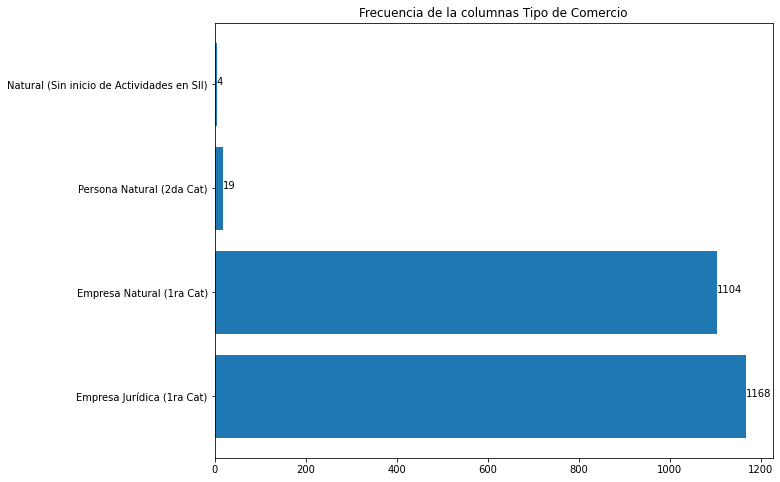

<Figure size 432x288 with 0 Axes>

In [23]:
plot_freq(data, "Tipo de Comercio")

#### Atributo Estado

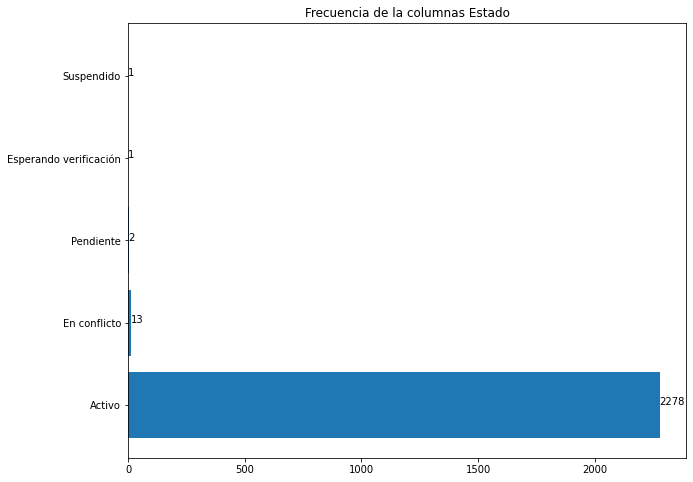

<Figure size 432x288 with 0 Axes>

In [24]:
plot_freq(data, "Estado")

Para el presente análisis, se mantendrán solo aquellos comercios que se encuentran en estado "activo"

In [25]:
data.shape

(2295, 11)

In [26]:
# Se verifica que el estado tome el valor de "activo."
data = data[data["Estado"] == "Activo"]

In [27]:
data.shape

(2278, 11)

#### Atributo Cuenta de Pago

In [33]:
data["Cuenta de Pago"].value_counts()

Cuenta de pago por defecto    366
Banco Estado                   91
Cuenta Banco Estado            61
Banco estado                   43
Banco Santander                34
                             ... 
Cuenta Molino de papel          1
Cuenta de pago Safident         1
Embakasi Studios                1
Multiespacio                    1
Soluciones Informáticas         1
Name: Cuenta de Pago, Length: 1456, dtype: int64

#### Atributo Actividad de Comercio

In [32]:
data["Actividad de Comercio"].value_counts()

Venta al por menor de alimentos en[...]    306
Actividades de restaurantes y de s[...]    212
Venta al por menor en comercios es[...]    183
Venta al por menor de otros produc[...]    135
Venta al por menor de artículos de[...]     80
                                          ... 
Apicultura                                   1
Actividades de laboratorios clínic[...]      1
Otras actividades de alojamiento p[...]      1
Enseñanza preuniversitaria                   1
Fabricación de artículos de hormig[...]      1
Name: Actividad de Comercio, Length: 222, dtype: int64

#### Atributo Perfil de Riesgo

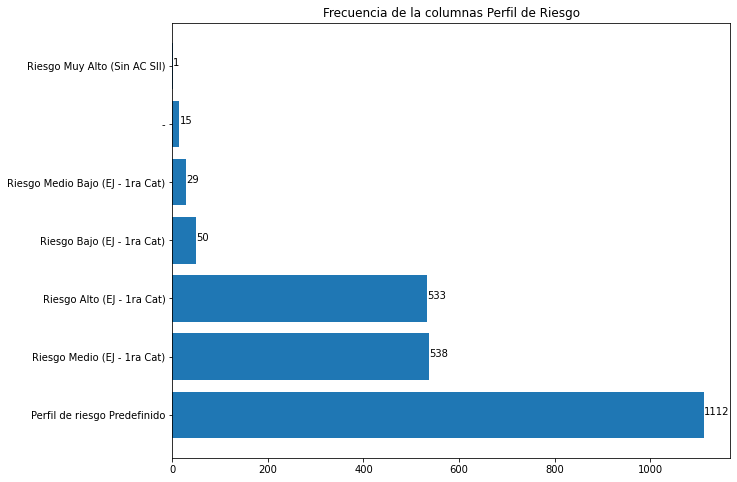

<Figure size 432x288 with 0 Axes>

In [34]:
plot_freq(data, "Perfil de Riesgo")

#### Atributo Origen de Verificación

In [36]:
data["Origen de Verificación"].value_counts()

Venta Online    2278
Name: Origen de Verificación, dtype: int64

Se observa que la variable "Origen de verificación" contien solamente un valor, por lo que, al no ser estadísticamente significativa, se toma la decisión de eliminarla del set de datos

In [37]:
data.drop(columns=["Origen de Verificación"], inplace = True)